### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1
from mlxtend.frequent_patterns import apriori, association_rules


import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('https://github.com/RanggaRijasa/DataMining2024/raw/refs/heads/main/Supermarket-December-2017.xlsx')
df.head()

# Loads dataset and shows the first five rows of the dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [3]:
df.describe()
# Describing data to see the numerical attributes for each numerical columns, starting from count, mean, standard deviation, and each quartile.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KDSUP,KAS,KDSLS,ITEM,BIN,KDBIN,TGL_TRANS,NO_ORD,SLD_AK,SLD_AKG,...,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,TANGGAL,LAMA_CRD
count,40832.000000,136294.000000,0.0,148486.000000,13586.000000,0.0,148486,0.0,11769.000000,9350.000000,...,0.0,0.0,0.0,0.0,8847,1.484860e+05,7264.000000,1668.000000,148486,37.0
mean,650.873384,4.497381,NaN,21322.181445,8.858531,NaN,2017-01-15 21:02:24.159045376,NaN,20.819228,15.819209,...,NaN,NaN,NaN,NaN,2016-12-07 05:29:26.429297920,1.717615e+11,313.185573,1.182854,2017-01-15 21:34:32.486295296,0.0
min,0.000000,1.000000,NaN,1.000000,1.000000,NaN,2017-01-01 00:00:00,NaN,-12.000000,-12.000000,...,NaN,NaN,NaN,NaN,2013-09-24 00:00:00,1.701010e+11,0.000000,1.000000,2017-01-01 00:00:00,0.0
25%,30.000000,3.000000,NaN,5221.000000,6.000000,NaN,2017-01-07 00:00:00,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,2016-12-01 00:00:00,1.701077e+11,8.000000,1.000000,2017-01-07 00:00:00,0.0
50%,999.000000,5.000000,NaN,13839.000000,8.000000,NaN,2017-01-15 00:00:00,NaN,3.000000,2.000000,...,NaN,NaN,NaN,NaN,2016-12-22 00:00:00,1.701160e+11,69.000000,1.000000,2017-01-16 00:00:00,0.0
75%,999.000000,6.000000,NaN,35802.750000,13.000000,NaN,2017-01-25 00:00:00,NaN,13.000000,11.000000,...,NaN,NaN,NaN,NaN,2017-01-05 00:00:00,1.701251e+11,444.000000,1.000000,2017-01-25 00:00:00,0.0
max,1769.000000,15.000000,NaN,700047.000000,19.000000,NaN,2017-01-31 00:00:00,NaN,2663.000000,1748.000000,...,NaN,NaN,NaN,NaN,2017-01-31 00:00:00,7.013157e+11,1769.000000,2.000000,2017-02-01 00:00:00,0.0
std,467.837803,1.906136,NaN,25881.022963,4.537190,NaN,NaN,NaN,70.033381,54.576439,...,NaN,NaN,NaN,NaN,NaN,2.951083e+10,463.993685,0.386662,NaN,0.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df.isnull().sum()
#Will show the null value

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,3
TP_TRN,3
KDSUP,107657
KAS,12195
TRN_DK,3
...,...
TP_ADJ,9413
USER,3
TANGGAL,3
JAM,3


In [6]:
df.isnull().sum() / len(df) * 100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,0.002020
TP_TRN,0.002020
KDSUP,72.501667
KAS,8.212730
TRN_DK,0.002020
...,...
TP_ADJ,6.339190
USER,0.002020
TANGGAL,0.002020
JAM,0.002020


In [7]:
df_clean = df

# 3. Cleaning Data (Only using important columns for the apriori and association rule)
relevant_columns = ['ITEM', 'NO_BKT', 'KEL', 'QTY', 'JLH_TRANS', 'TANGGAL', 'JAM', 'USER']  # Define relevant columns (with less null, and relatibility for visualization and association rules)
if all(col in df_clean.columns for col in relevant_columns):
    df_clean = df_clean[relevant_columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
df_clean.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
ITEM,3
NO_BKT,3
KEL,3
QTY,3
JLH_TRANS,3
TANGGAL,3
JAM,3
USER,3


In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df_clean = pd.DataFrame(imputer.fit_transform(df_clean), columns=df_clean.columns)

df_clean.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
ITEM,0
NO_BKT,0
KEL,0
QTY,0
JLH_TRANS,0
TANGGAL,0
JAM,0
USER,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


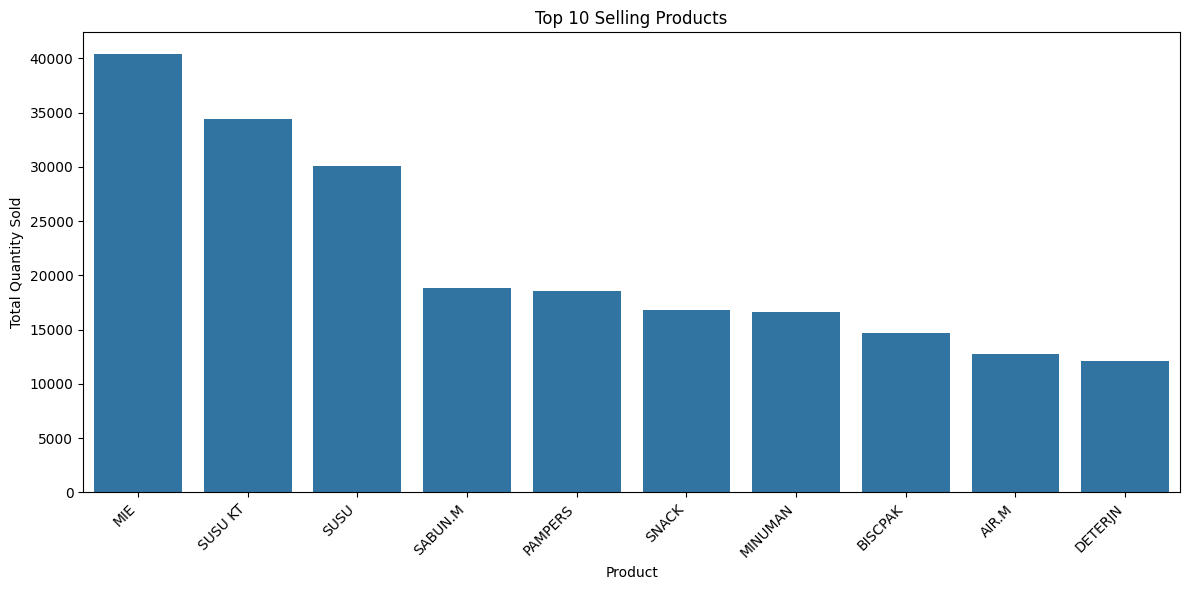

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_products = df_clean.groupby('KEL')['QTY'].sum().sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.index, y=top_10_products.values)
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [11]:
df_clean['TANGGAL'] = pd.to_datetime(df_clean['TANGGAL'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


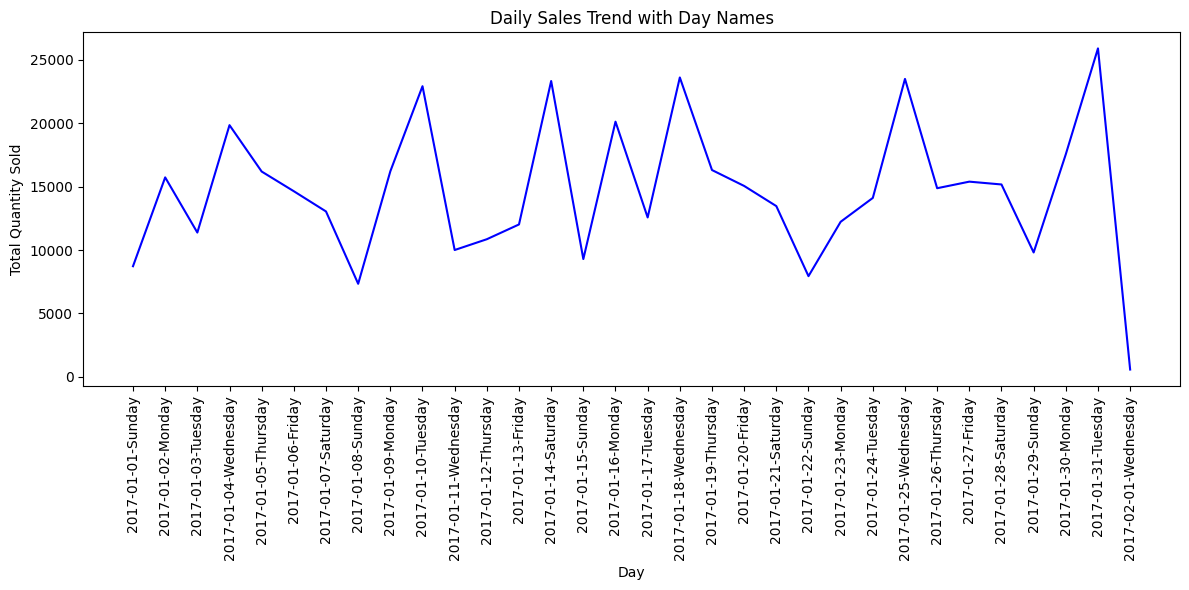

In [12]:
# Visualization: Seasonality Trends for January
df_clean['Day'] = df_clean['TANGGAL'].dt.date
df_clean['DayName'] = df_clean['TANGGAL'].dt.day_name()
daily_trend = df_clean.groupby(['Day', 'DayName'])['QTY'].sum().reset_index()

# Line chart for daily sales with day names
plt.figure(figsize=(12, 6))
plt.plot(daily_trend['Day'].astype(str) + '-' + daily_trend['DayName'], daily_trend['QTY'], color='blue')
plt.title('Daily Sales Trend with Day Names')
plt.xlabel('Day')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# In the seasonality trend of January, we can see that the peak days are Wednesday, Tuesday, with the highest on 31st of January.
# The lowest are on Sundays, indicating a low buying demand on the holidays.

In January's seasonality trend, the busiest days are Wednesday and Tuesday, with the highest sales occurring on January 31st. Conversely, Sundays show the lowest sales, suggesting reduced purchasing activity during holidays.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


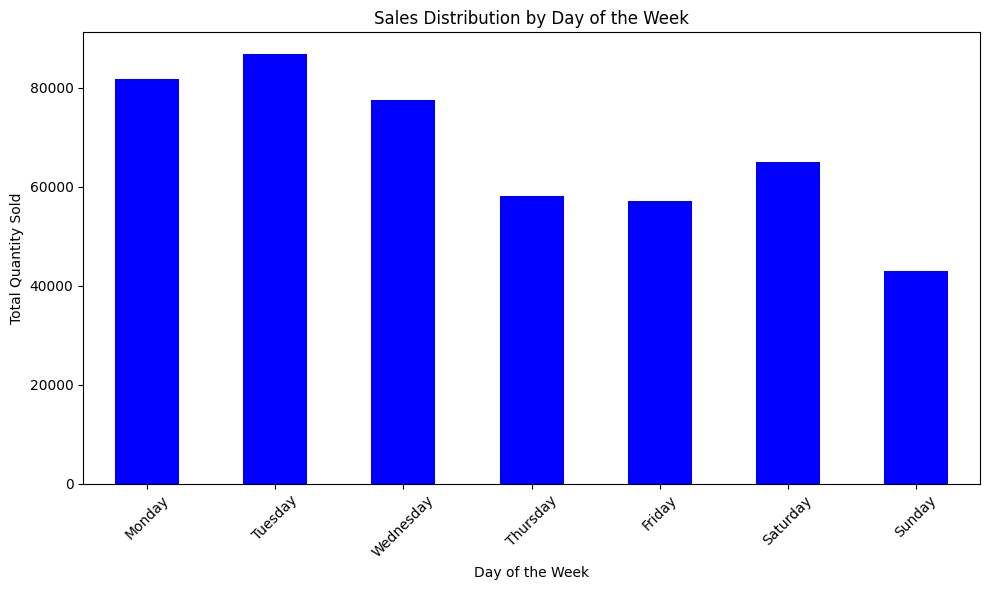

In [13]:
# Visualization: Sales Distribution by Day of the Week (all-time)
weekday_sales = df_clean.groupby('DayName')['QTY'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(10, 6))
weekday_sales.plot(kind='bar', color='blue')
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Apriori Algorithm

In [14]:
# Create a crosstab of transactions vs items
apriori_data = pd.crosstab(df_clean['NO_BKT'], df_clean['KEL'])
apriori_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Convert quantities to 1 and 0
basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-7e98910f9cad>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)
output = frequent_itemsets[['support', 'itemsets']]
print("Frequent Itemsets:")
output

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:


,support,itemsets
0,0.037991,(AIR.M)
1,0.032251,(ASESORS)
2,0.033590,(B DAPUR)
3,0.063600,(BISCPAK)
4,0.024106,(BTL/DOT)
5,0.032360,(COKLAT)
6,0.026593,(DDORANT)
7,0.083607,(DETERJN)
8,0.028507,(GULA)
9,0.021373,(HBL)


In [17]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("\nAssociation Rules:")
rules


Association Rules:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BISCPAK),(SNACK),0.063600,0.068984,0.021974,0.345509,5.008515,0.017587,1.422504,0.854699
1,(SNACK),(BISCPAK),0.068984,0.063600,0.021974,0.318542,5.008515,0.017587,1.374112,0.859642
2,(DETERJN),(MIE),0.083607,0.078878,0.023259,0.278195,3.526894,0.016664,1.276137,0.781831
3,(MIE),(DETERJN),0.078878,0.083607,0.023259,0.294872,3.526894,0.016664,1.299612,0.777817
4,(DETERJN),(SOFTENR),0.083607,0.042883,0.027605,0.330173,7.699413,0.024019,1.428902,0.949505
5,(SOFTENR),(DETERJN),0.042883,0.083607,0.027605,0.643722,7.699413,0.024019,2.572131,0.909105
6,(SUSU KT),(DETERJN),0.166530,0.083607,0.023997,0.144100,1.723545,0.010074,1.070678,0.503678
7,(DETERJN),(SUSU KT),0.083607,0.166530,0.023997,0.287022,1.723545,0.010074,1.168998,0.458101
8,(P GIGI),(PAMPERS),0.076227,0.139718,0.020608,0.270348,1.934954,0.009958,1.179030,0.523064
9,(PAMPERS),(P GIGI),0.139718,0.076227,0.020608,0.147496,1.934954,0.009958,1.083600,0.561667


### Conclusion Based on the Code, Analysis, and Actionable Insights:

1. **Data Cleaning and Preprocessing:**
   - The dataset was cleaned by selecting relevant columns, such as `ITEM`, `NO_BKT`, `KEL`, and others, to focus on meaningful data for analysis.
   - Missing values were addressed using the `SimpleImputer` method with the strategy of replacing them with the most frequent value, ensuring the dataset was complete and suitable for further analysis.

2. **Top 10 Selling Products:**
   - The analysis highlighted the top 10 products based on total quantity sold, categorized by `KEL`. A bar plot was used to visualize these best-selling products, offering insights into key items that drive sales. This helps in making informed decisions for inventory management and stock replenishment.

3. **Seasonality Trends (January Sales Analysis):**
   - A line chart was used to visualize daily sales trends in January, revealing that Wednesday and Tuesday were the peak sales days, with January 31st showing the highest sales. Understanding day-specific sales patterns allows for better forecasting and scheduling, optimizing stock allocation for peak periods.

4. **Sales Distribution by Day of the Week:**
   - The sales distribution by day of the week, depicted through a bar plot, indicated higher sales on weekdays (Monday to Wednesday), while weekends (Saturday and Sunday) had lower demand. This suggests that customer activity peaks earlier in the week, and sales strategies could be focused on weekdays with targeted marketing or promotions.

5. **Association Rule Mining (Apriori Algorithm):**
   - The data was transformed into a format suitable for association rule mining, where transactions were encoded with a presence indicator (1 for purchased, 0 for not purchased). Frequent itemsets were identified with a minimum support of 2%, and association rules were generated based on the "lift" metric, revealing which items tend to be purchased together.
   - The association rules offer valuable insights for developing cross-selling and bundling strategies. For example, items like `SHAMPOO` and `SABUN.M` have a high lift value (5.46), suggesting they should be placed near each other in the store to encourage complementary purchases.

6. **Actionable Insights:**

   - **Stock Management:** Key products like `MIE` (noodles), `SUSU KT` (milk powder), and `SUSU` should be prioritized in inventory management to avoid stockouts and ensure availability for customers.

   - **Sales Strategy:** Understanding the seasonality and weekday sales trends allows for better alignment of promotions and discounts with peak sales days. Mid-week (Tuesday to Wednesday) should be emphasized for high-demand promotions.

   - **Promotions and Cross-Selling:** Insights from the association rules can be used to develop effective cross-selling strategies:
     - **Complementary Product Placement:** Products like `SHAMPOO` and `SABUN.M` (soap) can be placed near each other in the personal care aisle due to their strong association.
     - **Strategic Placement for High-Demand Items:** Items like `SUSU KT` (milk powder) and `DETERJN` (detergent) should be placed together at aisle ends to promote purchases of related items.
     - **Bundle Promotions:** Items like `P GIGI` (toothpaste) and `SHAMPOO` can be bundled with discounts, such as "Buy shampoo, get toothpaste at 10% off", capitalizing on their frequent co-purchase.
     - **Cross-Selling Displays:** Create dedicated sections for items like `PAMPERS` (baby diapers) and other baby care products to offer convenience for parents and encourage cross-purchases.
     - **Impulse Buy Opportunities:** Items like `BISCPAK` (biscuits) and `SNACK` should be strategically placed near checkout counters to capitalize on last-minute, impulse buys.

By combining the analysis of sales trends and frequent itemsets, these actionable strategies can significantly improve inventory management, sales performance, and promotional activities. The insights derived from association rule mining offer valuable opportunities for enhancing customer experience through strategic product placement, bundling, and cross-selling tactics.